In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

In [10]:
DOWNLOAD = True #downloaded to drive by colab

#data augmemntation (training accuracy is expected to be lower)
transform_train = transforms.Compose(
    [
     transforms.RandomHorizontalFlip(),
     transforms.RandomGrayscale(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform = transforms.Compose(
    [
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
data_path = 'blabla/'

trainset = torchvision.datasets.CIFAR10(root=data_path, train=True, download=True, transform=transform)
trainset_trans = torchvision.datasets.CIFAR10(root=data_path, train=True, download=DOWNLOAD, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root=data_path, train=False, download=DOWNLOAD, transform=transform)

train_loader = torch.utils.data.DataLoader(trainset_trans, batch_size=5, shuffle=True) #batchsize 50 wont fit
train_ac_loader = torch.utils.data.DataLoader(trainset, batch_size=200, shuffle=False)
test_loader = torch.utils.data.DataLoader(testset, batch_size=50, shuffle=False)
test_ac_loader = torch.utils.data.DataLoader(testset, batch_size=200, shuffle=False)
test_all_loader = torch.utils.data.DataLoader(testset, batch_size=10000, shuffle=False)
test_one_loader = torch.utils.data.DataLoader(testset, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')
print(trainset.data.shape)
print(testset.data.shape)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3,   64,  3) #in, out, kernel
        self.conv2 = nn.Conv2d(64,  128, 3)
        self.conv3 = nn.Conv2d(128, 256, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256*2*2, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def forward_h(self, x):
        #print(x.shape)
        a_s = []
        h1 = F.relu(self.conv1(x)) # 3 32 32 64 30 30
        a_s.append(h1)
        p1 = self.pool(h1)  # 64 15 15
        h2 = F.relu(self.conv2(p1)) 
        a_s.append(h2)
        p2 = self.pool(h2) # 128 6 6
        h3 = F.relu(self.conv3(p2)) 
        a_s.append(h3)
        p3 = self.pool(h3) # 256 2 2
        _hidden = p3.view(-1, 256*2*2)
        _hidden = F.relu(self.fc1(_hidden))
        _hidden = F.relu(self.fc2(_hidden))
        y = self.fc3(_hidden)
        a_s.append(y)
        #x = F.log_softmax(x, dim=1)
        return a_s


In [0]:
cnn = CNN()

In [25]:
it = iter(test_one_loader)
data , output= it.next()
data.shape

torch.Size([1, 3, 32, 32])

In [44]:
a_s = cnn.forward_h(data)
h1 = a_s[0].detach().numpy()[0]
h2 = a_s[1].detach().numpy()[0]
#h2 = h2.transpose((1,2,0))
h2.shape

(128, 13, 13)

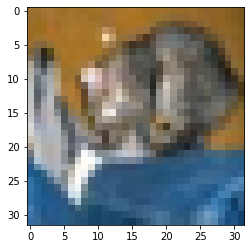

In [62]:
def imshow(img): #for dataloader's output
    # [-1,1] to [0,1]
    img = img / 2 + 0.5   
    if not (type(img).__module__ == np.__name__):
      img = img.numpy()
    # [3,32,32] to [32,32,3]
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

imshow(data[0])

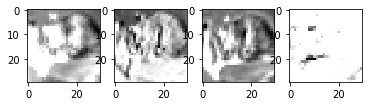

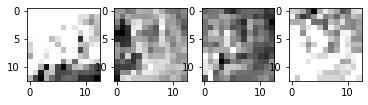

In [87]:
def show_hidden(data, idx, n_show_feature):#for one  data from data loader
    a_s = cnn.forward_h(data)
    h1 = a_s[0].detach().numpy()[idx]
    h2 = a_s[1].detach().numpy()[idx]

    for i in range(1, 1+n_show_feature):
        #f, axs = plt.subplots(1,n_show_feature,figsize=(1,1))
        plt.subplot(1,n_show_feature,i)
        plt.imshow(h1[i],cmap=plt.cm.binary)
    plt.show()
    for i in range(1, 1+n_show_feature):
        plt.subplot(1,n_show_feature ,i)
        plt.imshow(h2[i],cmap=plt.cm.binary)
    plt.show()
    return 

show_hidden(data, 0, 4)
cnn.forward(data)